# Hist
## Goal: create an accurate temperature hindcast using historical GHG concentrations
- 1850 to 2022
- Using FaIR calibration data on hist concentrations
- Also experiment with volcanic and solar forcing as internal variability
- Note: this notebook does not incorporate a perturbed parameter ensemble (PPE); it is solely meant for learning how to input historical data
### Erica Simon, 01/22/24
Smith, C. (2023). FaIR calibration data (1.3.1) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.10208609

Link to data: https://github.com/chrisroadmap/fair-calibrate/blob/main/data/concentrations/ghg_concentrations_1750-2022.csv

In [535]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pooch

from fair import FAIR
from fair.interface import fill, initialise
from fair.io import read_properties

# without volcanic & solar forcing

In [536]:
f1 = FAIR()

In [537]:
f1.define_time(1850, 2022, 1)

In [538]:
scenarios = ['s1']
f1.define_scenarios(scenarios)

## Define configs

In [539]:
f1.define_configs(['c1'])

## Define species and properties

In [540]:
df_conc = pd.read_csv('~/data/ghg_concentrations_1750-2022.csv', index_col=0)

In [541]:
species, properties = read_properties(filename='~/data/species_configs_properties_calibration1.2.0.csv')

In [542]:
for spc in list(properties):
    if spc not in df_conc:
        species.remove(spc)
        properties.pop(spc)
    else:
        # change all to concentration-driven for this datatset
        properties[spc]['input_mode'] = 'concentration'

In [543]:
properties['CO2']['input_mode']

'concentration'

In [544]:
f1.define_species(species, properties)

In [545]:
f1.species

['CO2',
 'CH4',
 'N2O',
 'CFC-11',
 'CFC-12',
 'CFC-113',
 'CFC-114',
 'CFC-115',
 'HCFC-22',
 'HCFC-141b',
 'HCFC-142b',
 'CCl4',
 'CHCl3',
 'CH2Cl2',
 'CH3Cl',
 'CH3CCl3',
 'CH3Br',
 'Halon-1211',
 'Halon-1301',
 'Halon-2402',
 'CF4',
 'C2F6',
 'C3F8',
 'c-C4F8',
 'C7F16',
 'C8F18',
 'NF3',
 'SF6',
 'SO2F2',
 'HFC-125',
 'HFC-134a',
 'HFC-143a',
 'HFC-152a',
 'HFC-227ea',
 'HFC-23',
 'HFC-236fa',
 'HFC-245fa',
 'HFC-32',
 'HFC-365mfc']

## Data

In [546]:
f1.allocate()

## Fill concentrations

In [547]:
# drop the year 1750- not relevant to this analysis
df_conc = df_conc.drop([1750])
df_conc.head()

,CO2,CH4,N2O,HFC-134a,HFC-23,HFC-32,HFC-125,HFC-143a,HFC-152a,HFC-227ea,...,i-C6F14,C7F16,C8F18,CFC-112,CFC-112a,CFC-113a,CFC-114a,HCFC-133a,HCFC-31,HCFC-124
YYYY,,,,,,,,,,,,,,,,,,,,,
1850,285.500000,807.600000,272.100000,0.0,0.0,0.000218,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851,285.621912,807.768974,272.181132,0.0,0.0,0.000221,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852,285.759838,808.522848,272.262214,0.0,0.0,0.000223,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1853,285.883757,809.768605,272.365269,0.0,0.0,0.000226,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854,285.989701,811.101520,272.471345,0.0,0.0,0.000229,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [548]:
for column in df_conc:
    # print(column)
    if column in f1.species:
        conc = df_conc[column].values.reshape(173, 1)
        fill(f1.concentration, conc, scenario='s1', specie=column)

## Fill climate configs

In [549]:
fill(f1.climate_configs["ocean_heat_transfer"], [1.1, 1.6, 0.9], config='c1')
fill(f1.climate_configs["ocean_heat_capacity"], [8, 14, 100], config='c1')
fill(f1.climate_configs["deep_ocean_efficacy"], 1.1, config='c1')

## Fill species configs

In [550]:
f1.fill_species_configs()

## Define initial conditions

In [551]:
initialise(f1.concentration, f1.species_configs["baseline_concentration"])
initialise(f1.forcing, 0)
initialise(f1.temperature, 0)   # f.temperature refers to temperature rise above PI (288 K)
initialise(f1.cumulative_emissions, 0)
initialise(f1.airborne_emissions, 0)

## Run

In [552]:
f1.run()

Running 1 projections in parallel:   0%|          | 0/172 [00:00<?, ?timesteps/s]

# with volcanic & solar forcing

## Create instance

In [553]:
f2 = FAIR()

In [554]:
f2.define_time(1850, 2022, 1)

In [555]:
scenarios = ['s1']
f2.define_scenarios(scenarios)

## Define configs

In [556]:
f2.define_configs(['c1'])

## Define species and properties

In [557]:
df_conc = pd.read_csv('~/data/ghg_concentrations_1750-2022.csv', index_col=0)

In [558]:
species, properties = read_properties(filename='~/data/species_configs_properties_calibration1.2.0.csv')

In [559]:
for spc in list(properties): 
    if spc != 'Solar' and spc != 'Volcanic':
        if spc not in df_conc:
            species.remove(spc)
            properties.pop(spc)
        else:
            # change all to concentration-driven for this datatset
            properties[spc]['input_mode'] = 'concentration'

In [560]:
properties['CO2']['input_mode']

'concentration'

In [561]:
f2.define_species(species, properties)

In [562]:
f2.species

['CO2',
 'CH4',
 'N2O',
 'CFC-11',
 'CFC-12',
 'CFC-113',
 'CFC-114',
 'CFC-115',
 'HCFC-22',
 'HCFC-141b',
 'HCFC-142b',
 'CCl4',
 'CHCl3',
 'CH2Cl2',
 'CH3Cl',
 'CH3CCl3',
 'CH3Br',
 'Halon-1211',
 'Halon-1301',
 'Halon-2402',
 'CF4',
 'C2F6',
 'C3F8',
 'c-C4F8',
 'C7F16',
 'C8F18',
 'NF3',
 'SF6',
 'SO2F2',
 'HFC-125',
 'HFC-134a',
 'HFC-143a',
 'HFC-152a',
 'HFC-227ea',
 'HFC-23',
 'HFC-236fa',
 'HFC-245fa',
 'HFC-32',
 'HFC-365mfc',
 'Solar',
 'Volcanic']

## Data

In [563]:
f2.allocate()

## Fill concentrations

In [564]:
# drop the year 1750- not relevant to this analysis
df_conc = df_conc.drop([1750])
df_conc.head()

,CO2,CH4,N2O,HFC-134a,HFC-23,HFC-32,HFC-125,HFC-143a,HFC-152a,HFC-227ea,...,i-C6F14,C7F16,C8F18,CFC-112,CFC-112a,CFC-113a,CFC-114a,HCFC-133a,HCFC-31,HCFC-124
YYYY,,,,,,,,,,,,,,,,,,,,,
1850,285.500000,807.600000,272.100000,0.0,0.0,0.000218,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851,285.621912,807.768974,272.181132,0.0,0.0,0.000221,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852,285.759838,808.522848,272.262214,0.0,0.0,0.000223,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1853,285.883757,809.768605,272.365269,0.0,0.0,0.000226,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854,285.989701,811.101520,272.471345,0.0,0.0,0.000229,0.0,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [565]:
for column in df_conc:
    # print(column)
    if column in f2.species:
        conc = df_conc[column].values.reshape(173, 1)
        fill(f2.concentration, conc, scenario='s1', specie=column)

## Fill solar & volcanic forcing

In [566]:
solar_obj = pooch.retrieve(
    url = 'https://raw.githubusercontent.com/chrisroadmap/fair-add-hfc/main/data/solar_erf_timebounds.csv',
    known_hash = 'md5:98f6f4c5309d848fea89803683441acf',
)

In [567]:
volcanic_obj = pooch.retrieve(
    url = 'https://raw.githubusercontent.com/chrisroadmap/fair-calibrate/main/data/forcing/volcanic_ERF_1750-2101_timebounds.csv',
    known_hash = 'md5:c0801f80f70195eb9567dbd70359219d',
)

In [568]:
df_solar = pd.read_csv(solar_obj, index_col="year")
df_volcanic = pd.read_csv(volcanic_obj, index_col="timebounds")

In [569]:
# only want years 1850-2022
s_yr_list = list(range(1750, 1850))
s_yr_list.extend(list(range(2023, 2301)))

v_yr_list = list(range(1750, 1850))
v_yr_list.extend(list(range(2023, 2102)))

df_solar = df_solar.drop(s_yr_list)
df_volcanic = df_volcanic.drop(v_yr_list)

In [570]:
df_solar

,erf
year,
1850,-0.004587
1851,0.007755
1852,0.002283
1853,0.001503
1854,-0.008609
...,...
2018,-0.017257
2019,-0.021258
2020,-0.021963


In [571]:
df_volcanic

,erf
timebounds,
1850,0.243546
1851,0.245486
1852,0.245843
1853,0.238493
1854,0.246023
...,...
2018,0.202711
2019,0.182834
2020,0.127848


In [572]:
fill(f2.forcing, df_volcanic, scenario='s1', specie='Volcanic')
fill(f2.forcing, df_solar, scenario='s1', specie='Solar')

## Fill climate configs

In [573]:
fill(f2.climate_configs["ocean_heat_transfer"], [1.1, 1.6, 0.9], config='c1')
fill(f2.climate_configs["ocean_heat_capacity"], [8, 14, 100], config='c1')
fill(f2.climate_configs["deep_ocean_efficacy"], 1.1, config='c1')

## Fill species configs

In [574]:
f2.fill_species_configs()

## Define initial conditions

In [575]:
initialise(f2.concentration, f2.species_configs["baseline_concentration"])
initialise(f2.forcing, 0)
initialise(f2.temperature, 0)   # f.temperature refers to temperature rise above PI (288 K)
initialise(f2.cumulative_emissions, 0)
initialise(f2.airborne_emissions, 0)

## Run

In [576]:
f2.run()

Running 1 projections in parallel:   0%|          | 0/172 [00:00<?, ?timesteps/s]

# Analyze output

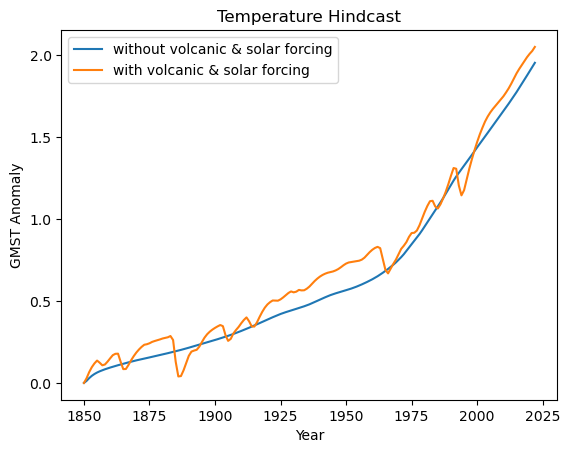

In [577]:
plt.plot(f1.timebounds.reshape(173, 1), f1.temperature[dict(layer=0, scenario=0)], label='without volcanic & solar forcing')
plt.plot(f2.timebounds.reshape(173, 1), f2.temperature[dict(layer=0, scenario=0)], label='with volcanic & solar forcing')
plt.ylabel('GMST Anomaly')
plt.xlabel('Year')
plt.title('Temperature Hindcast')
plt.legend()

solar and volcanic forcing incorporate internal variability